<p style="text-align: center;"> <span style="color:skyblue"> <font size="5"> <b> CNN Neural Network - Image Classification  </b> </font> </p> </span> 
<p style="text-align: center;"> <b> <font font size="4"> By: Kofi Buahin </p> </b></font>

## Library Imports  

In [73]:
import os
import pathlib
import pickle
import warnings
warnings.filterwarnings('ignore')


#Standard Data Science Libraries
import numpy as np
import pandas as pd

#Image Processing Relevant Tools
from PIL import Image, ImageOps
from IPython.display import display

# Machine Learning Relevant Tools
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 
plt.style.use('ggplot')
rcParams['figure.figsize'] = (18, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

## Data Pre-processing

In [74]:
dir = str(pathlib.Path().resolve())
image_classes = [folder for folder in os.listdir(dir+'/natural_images') ]
image_classes

['cat', 'dog', 'person']

We don't have images of the same size so we should rescale them. We do that using functions below

In [75]:
# Containers for Numpy Arrays of Image data.
from pandas import value_counts


y_labels = []
x_data = []
val_counts = {}

# Function to Process images
def ImageProcessor(img_path):
    img = Image.open(img_path)
    img = img.resize(size=(32, 32))
    img = np.asarray(img)/ 255.0
    return img

# def FolderProcessor(label):
def FolderProcessor(label,lst):
    folder = dir + '/natural_images/{}'.format(label) 
    processed = [] # Storage container for images
    for img in os.listdir(folder): # For every image in the directory
        pic_dir = folder + '/{}'.format(img)
        processed.append(ImageProcessor(pic_dir))
        y_labels.append(label)  # Add a class column
    lst.append(processed) # Convert to pd.DataFrame
    return processed

#### Loading Data

We can now merge all the processed data into a single dataframe here:

In [76]:
[FolderProcessor(c, x_data) for c in image_classes]

[[array([[[0.41568627, 0.30196078, 0.29411765],
          [0.54509804, 0.34901961, 0.30196078],
          [0.52941176, 0.42745098, 0.30980392],
          ...,
          [0.47843137, 0.43137255, 0.38431373],
          [0.6       , 0.57254902, 0.50196078],
          [0.59215686, 0.55686275, 0.49411765]],
  
         [[0.51372549, 0.46666667, 0.50588235],
          [0.36078431, 0.28627451, 0.34509804],
          [0.29019608, 0.2627451 , 0.39607843],
          ...,
          [0.47843137, 0.41960784, 0.38431373],
          [0.60392157, 0.57647059, 0.51372549],
          [0.6       , 0.57647059, 0.51372549]],
  
         [[0.65882353, 0.65098039, 0.6627451 ],
          [0.59215686, 0.5372549 , 0.5254902 ],
          [0.46666667, 0.38039216, 0.41960784],
          ...,
          [0.49411765, 0.43529412, 0.39607843],
          [0.61568627, 0.59215686, 0.52941176],
          [0.61960784, 0.60392157, 0.5372549 ]],
  
         ...,
  
         [[0.41568627, 0.41568627, 0.45882353],
          [0.3

We must now split the dataset into test and train and we must also encode the target variable class

In [77]:
X_vars = np.concatenate(x_data, axis=0)
y_vars = np.array(y_labels)
print('X Data Shape: {}'.format(X_vars.shape))
print('Y Data Shape: {}'.format(y_vars.shape))

y_encoded = LabelEncoder().fit_transform(y_vars)
y_categorical = to_categorical(y_encoded)



X Data Shape: (2573, 32, 32, 3)
Y Data Shape: (2573,)


In [78]:
del x_data

In [79]:
shuffle = np.arange(X_vars.shape[0])
np.random.seed(15)
np.random.shuffle(shuffle)
X = X_vars[shuffle]
# X = np.array(X_vars[shuffle])
y = y_categorical[shuffle]


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Exploratory Data Analysis (If Needed)

In [81]:
# class_dist = Counter(y_labels)
# class_dist = X_vars['class'].value_counts()

# fig, ax = plt.subplots()

# p = plt.barh(class_dist.index, class_dist)
# ax.set_xlabel('Class')
# ax.set_ylabel('Count of Images')
# ax.set_title('Number Pictures in Dataset by Class')

# bar_labels = class_dist # series of label
# [ax.text(v, i, v) for i, v in enumerate(bar_labels)]

# plt.title("Number Pictures in Dataset by Class", 
#           loc= 'center',
#           fontsize = 20,
#           fontweight = 'bold',
#           pad = 20, 
#           color = 'black')

# plt.show()

***Show some random pictures selected from the training set***

## Model Building

### Iteration 1 - MLP Classifier

In [82]:
tf.random.set_seed(15)

mlp_nn = tf.keras.Sequential()
mlp_nn.add(layers.Flatten(input_shape=X_train.shape[1:]))
mlp_nn.add(layers.Dense(2048, activation='relu'))
mlp_nn.add(layers.Dense(1024, activation='relu'))
mlp_nn.add(layers.Dense(1024, activation='relu'))
mlp_nn.add(layers.Dropout(rate=0.25))
mlp_nn.add(layers.Dense(128, activation='relu'))
mlp_nn.add(layers.Dense(3, activation='softmax'))


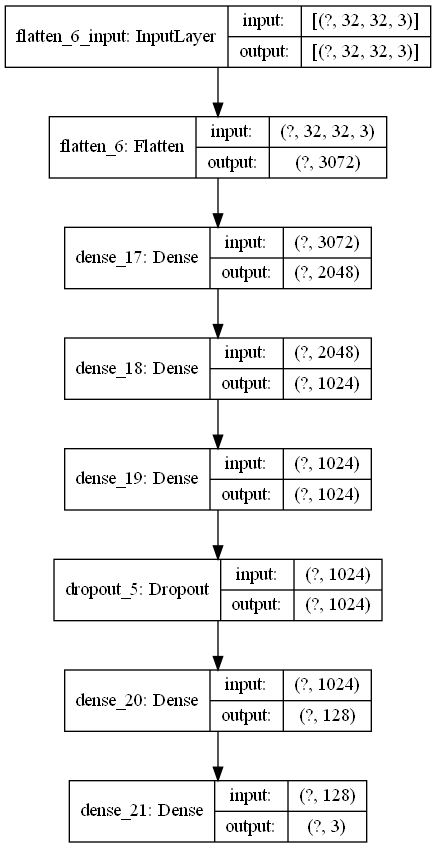

In [83]:
plot_model(mlp_nn, show_shapes = True,expand_nested = True)

In [84]:
mlp_nn.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_mlp = mlp_nn.fit(
    X_train,
    y_train,
    epochs=25,
    # batch_size=128,
    validation_split= 0.2,
    callbacks = early_stopping_cb
)

Epoch 1/25
45/45 [==============================] - 13s 292ms/step - loss: 1.2553 - accuracy: 0.6701 - val_loss: 0.8839 - val_accuracy: 0.7239
Epoch 2/25
45/45 [==============================] - 14s 318ms/step - loss: 0.6634 - accuracy: 0.7771 - val_loss: 0.5527 - val_accuracy: 0.8033
Epoch 3/25
45/45 [==============================] - 20s 441ms/step - loss: 0.5439 - accuracy: 0.8127 - val_loss: 0.4846 - val_accuracy: 0.8079
Epoch 4/25
45/45 [==============================] - 15s 331ms/step - loss: 0.5164 - accuracy: 0.8248 - val_loss: 0.4811 - val_accuracy: 0.8236
Epoch 5/25
45/45 [==============================] - 14s 318ms/step - loss: 0.5892 - accuracy: 0.8056 - val_loss: 0.7282 - val_accuracy: 0.7701
Epoch 6/25
45/45 [==============================] - 14s 319ms/step - loss: 0.5003 - accuracy: 0.8139 - val_loss: 0.4934 - val_accuracy: 0.8107
Epoch 7/25
45/45 [==============================] - 15s 325ms/step - loss: 0.4937 - accuracy: 0.8225 - val_loss: 0.4719 - val_accuracy: 0.8440

In [85]:
mlp_nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_21 (Dense)             (None, 3)                

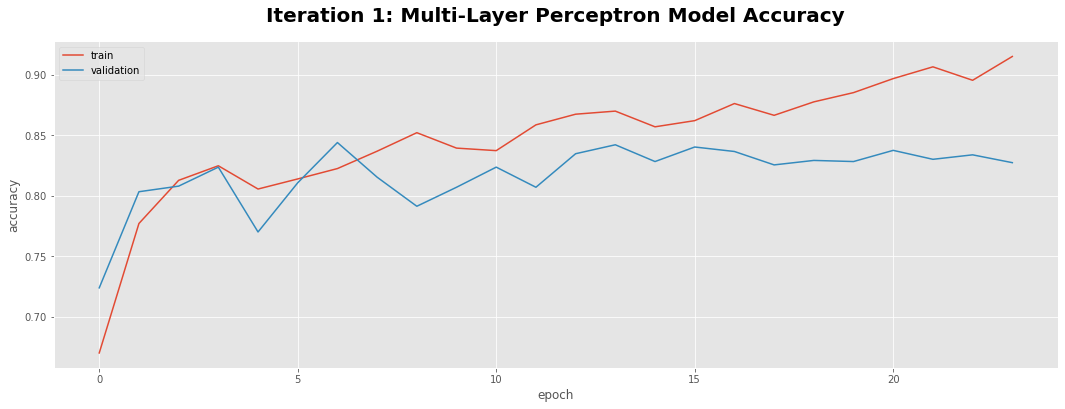

In [86]:
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title("Iteration 1: Multi-Layer Perceptron Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


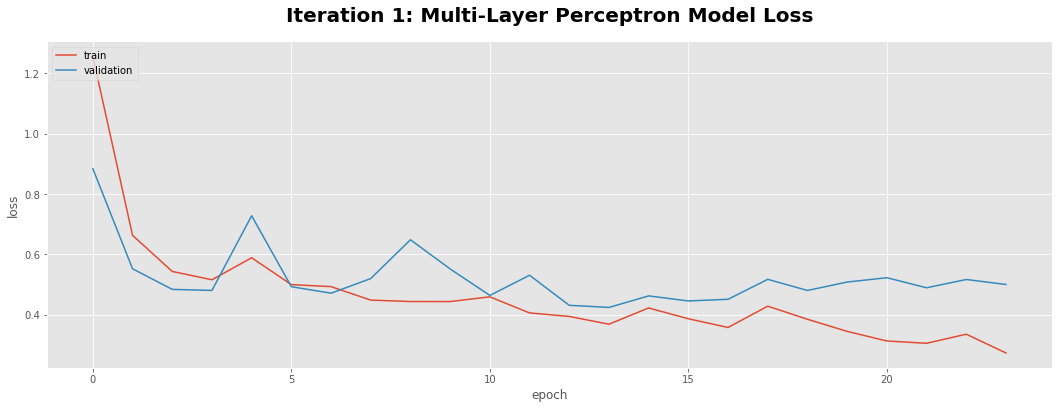

In [87]:
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title("Iteration 1: Multi-Layer Perceptron Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [88]:
loss, accuracy = mlp_nn.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)


25/25 [==============================] - 1s 37ms/step - loss: 0.4658 - accuracy: 0.8364
Loss:  0.4658079445362091
Accuracy:  0.8363558053970337


In [89]:
y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.75

In [90]:
y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       269
           1       0.57      0.55      0.56       216
           2       0.96      0.98      0.97       287

    accuracy                           0.75       772
   macro avg       0.73      0.73      0.73       772
weighted avg       0.75      0.75      0.75       772



We can see the performance (precision) on the human images is significantly better on people faces versus dogs and cats....

elaborate more here

In [91]:
X_train.shape[1:]

(32, 32, 3)

### Iteration 2 - Basic Custom CNN Network Architecture

In [92]:
CNN_basic = keras.models.Sequential([
    keras.layers.Conv2D(32, 5, activation="relu",input_shape=X_train.shape[1:], padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(64, 3, activation="relu",padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(128, 3, activation="relu",padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Dropout(0.3),

    keras.layers.Flatten(),
    
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(3, activation="softmax")
])

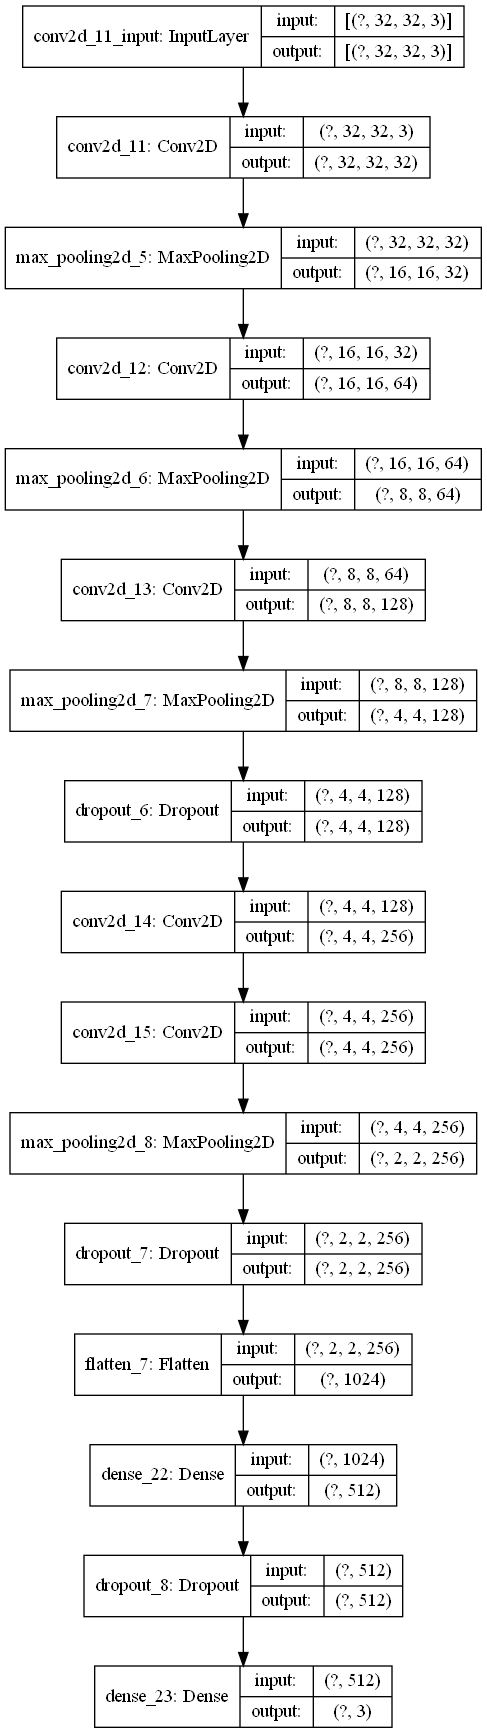

In [93]:
plot_model(CNN_basic, show_shapes = True,expand_nested = True)

In [94]:
CNN_basic.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [95]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_CNNbasic = CNN_basic.fit(
    X_train,
    y_train,
    epochs=25,
    # batch_size=128,
    validation_split= 0.2,
    callbacks = early_stopping_cb
)

Epoch 1/25
45/45 [==============================] - 23s 511ms/step - loss: 0.9896 - accuracy: 0.7069 - val_loss: 0.8503 - val_accuracy: 0.7535
Epoch 2/25
45/45 [==============================] - 21s 476ms/step - loss: 0.7226 - accuracy: 0.7762 - val_loss: 0.6185 - val_accuracy: 0.7858
Epoch 3/25
45/45 [==============================] - 21s 470ms/step - loss: 0.5787 - accuracy: 0.8044 - val_loss: 0.5061 - val_accuracy: 0.7692
Epoch 4/25
45/45 [==============================] - 21s 475ms/step - loss: 0.5100 - accuracy: 0.8171 - val_loss: 0.5154 - val_accuracy: 0.7978
Epoch 5/25
45/45 [==============================] - 16s 351ms/step - loss: 0.4872 - accuracy: 0.8222 - val_loss: 0.4993 - val_accuracy: 0.8218
Epoch 6/25
45/45 [==============================] - 17s 374ms/step - loss: 0.4504 - accuracy: 0.8421 - val_loss: 0.4793 - val_accuracy: 0.8218
Epoch 7/25
45/45 [==============================] - 17s 367ms/step - loss: 0.4412 - accuracy: 0.8514 - val_loss: 0.4413 - val_accuracy: 0.8366

In [96]:
CNN_basic.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 128)        

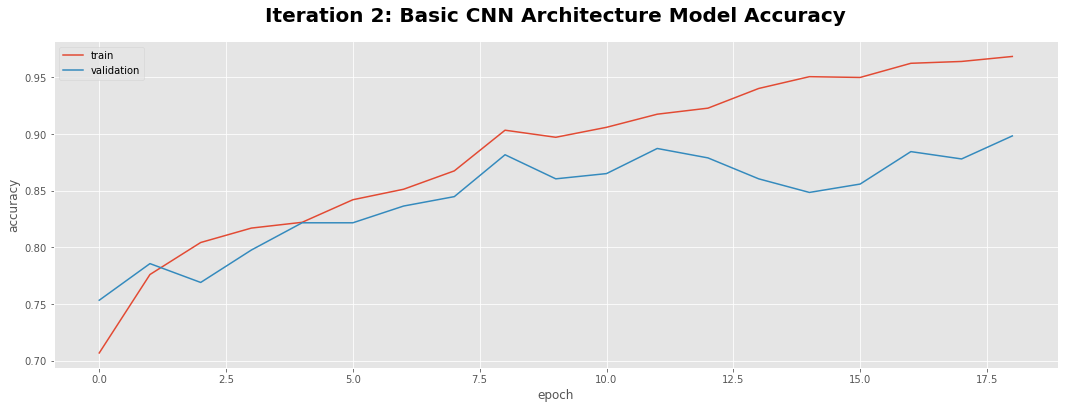

In [97]:
plt.plot(history_CNNbasic.history['accuracy'])
plt.plot(history_CNNbasic.history['val_accuracy'])
plt.title("Iteration 2: Basic CNN Architecture Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

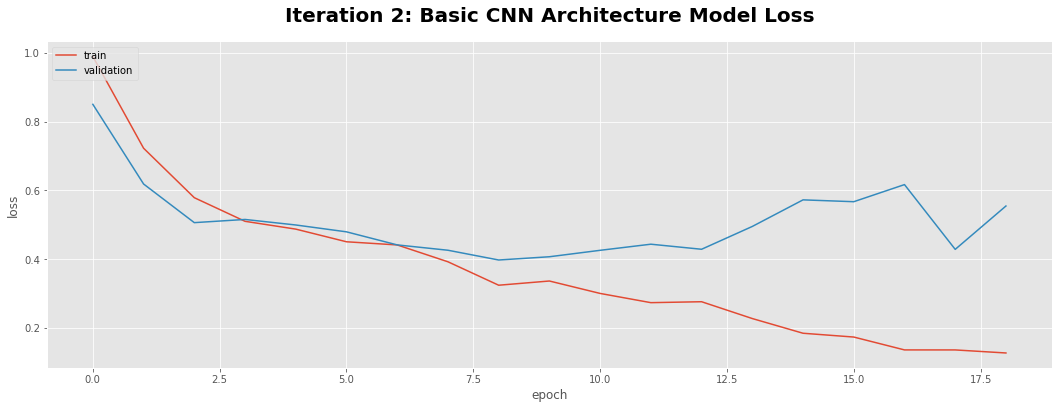

In [98]:
plt.plot(history_CNNbasic.history['loss'])
plt.plot(history_CNNbasic.history['val_loss'])
plt.title("Iteration 2: Basic CNN Architecture Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [99]:
loss, accuracy = CNN_basic.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)


25/25 [==============================] - 1s 54ms/step - loss: 0.3648 - accuracy: 0.8864
Loss:  0.36483150720596313
Accuracy:  0.8864420652389526


In [100]:
y_pred = np.argmax(CNN_basic.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.829

In [101]:
# y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
# y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       269
           1       0.71      0.68      0.69       216
           2       0.99      0.98      0.98       287

    accuracy                           0.83       772
   macro avg       0.82      0.82      0.82       772
weighted avg       0.83      0.83      0.83       772



### Iteration 3 - Implementing Recreation of a Popular Architecture (AlexNet)

In [102]:
AlexNet = keras.models.Sequential([
    keras.layers.Conv2D(96, kernel_size=(11,11), activation="relu", input_shape=X_train.shape[1:], strides=(4,4), padding="valid"), #C1 Layer 
    tf.keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(strides=2,padding='valid'),                                                                           #S2 Layer

    keras.layers.Conv2D(256, kernel_size=(5,5), activation="relu", strides=1, padding="same"),                                      #C3 Layer
    tf.keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(strides=2, padding='valid'),                                                                          #S4 Layer

    keras.layers.Conv2D(384, kernel_size=(3,3), activation="relu", strides=1, padding="same"),                                      #C5 Layer
    tf.keras.layers.BatchNormalization(),

    keras.layers.Conv2D(384, kernel_size=(3,3), activation="relu", strides=1, padding="same"),                                      #C6 Layer
    tf.keras.layers.BatchNormalization(),

    keras.layers.Conv2D(256, kernel_size=(3,3), activation="relu", strides=1, padding="same"),                                      #C7 Layer
    tf.keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),                                                                                                         #Flatten 

    keras.layers.Dense(4096, activation="relu"),                                                                                    #F8 Layer
    keras.layers.Dense(4096, activation="relu"),                                                                                    #F9 Layer

    
    keras.layers.Dense(3, activation="softmax")                                                                                     #Output Layer
])

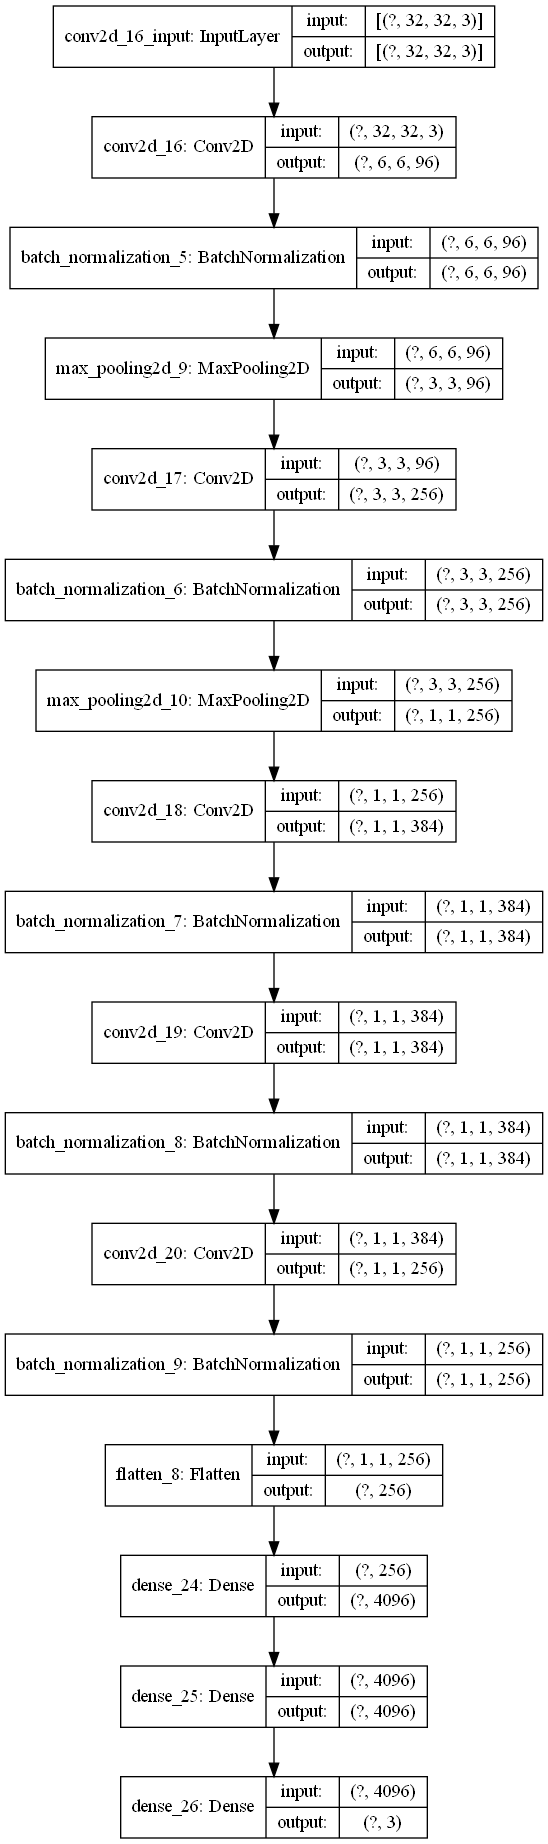

In [103]:
plot_model(AlexNet, show_shapes = True,expand_nested = True)

In [104]:
AlexNet.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [105]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_AlexNet = AlexNet.fit(
    X_train,
    y_train,
    epochs=25,
    # batch_size=128,
    validation_split= 0.2,
    callbacks = early_stopping_cb
)

Epoch 1/25
45/45 [==============================] - 52s 1s/step - loss: 1.2478 - accuracy: 0.7590 - val_loss: 1.1096 - val_accuracy: 0.6667
Epoch 2/25
45/45 [==============================] - 49s 1s/step - loss: 0.5318 - accuracy: 0.8192 - val_loss: 1.0436 - val_accuracy: 0.6667
Epoch 3/25
45/45 [==============================] - 50s 1s/step - loss: 0.4555 - accuracy: 0.8509 - val_loss: 1.1359 - val_accuracy: 0.6667
Epoch 4/25
45/45 [==============================] - 51s 1s/step - loss: 0.4894 - accuracy: 0.8528 - val_loss: 1.0154 - val_accuracy: 0.6824
Epoch 5/25
45/45 [==============================] - 50s 1s/step - loss: 0.4381 - accuracy: 0.8567 - val_loss: 0.6229 - val_accuracy: 0.8033
Epoch 6/25
45/45 [==============================] - 51s 1s/step - loss: 0.4600 - accuracy: 0.8567 - val_loss: 0.5902 - val_accuracy: 0.7932
Epoch 7/25
45/45 [==============================] - 51s 1s/step - loss: 0.4270 - accuracy: 0.8801 - val_loss: 1.0294 - val_accuracy: 0.6944
Epoch 8/25
45/45 [==

In [106]:
AlexNet.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 6, 6, 96)          34944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 6, 6, 96)          384       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 96)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 256)         614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 1, 384)        

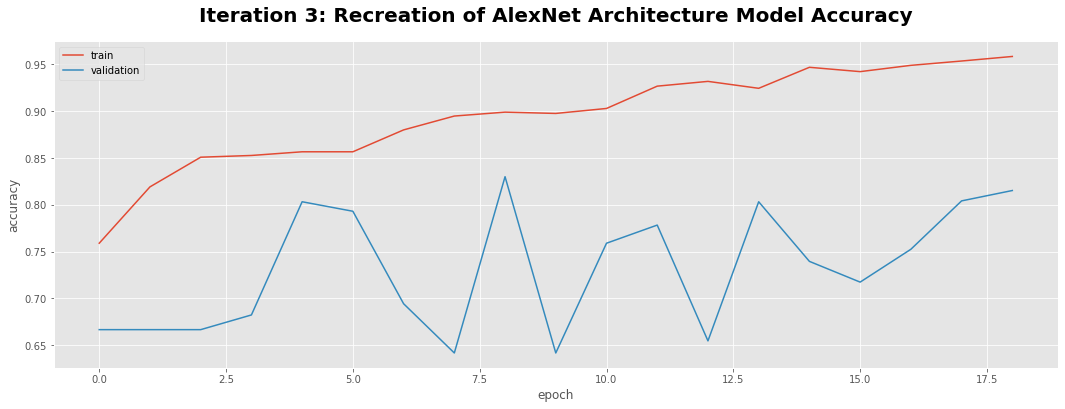

In [107]:
plt.plot(history_AlexNet.history['accuracy'])
plt.plot(history_AlexNet.history['val_accuracy'])
plt.title("Iteration 3: Recreation of AlexNet Architecture Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

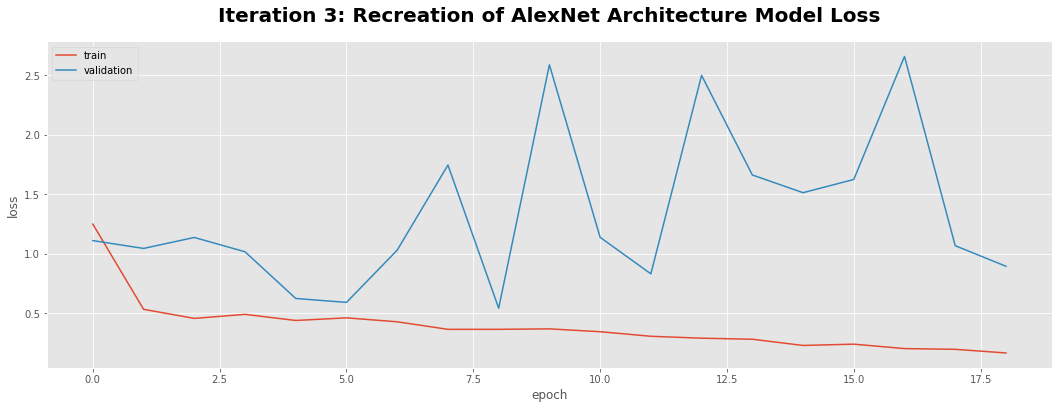

In [108]:
plt.plot(history_AlexNet.history['loss'])
plt.plot(history_AlexNet.history['val_loss'])
plt.title("Iteration 3: Recreation of AlexNet Architecture Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [109]:
loss, accuracy = AlexNet.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

25/25 [==============================] - 1s 46ms/step - loss: 0.5381 - accuracy: 0.8364
Loss:  0.5381331443786621
Accuracy:  0.8363558053970337


In [110]:
y_pred = np.argmax(AlexNet.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.7526

In [111]:
y_pred = np.argmax(AlexNet.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64       269
           1       0.56      0.77      0.65       216
           2       0.99      0.90      0.95       287

    accuracy                           0.75       772
   macro avg       0.76      0.75      0.75       772
weighted avg       0.78      0.75      0.76       772



## Final Predictions: Dataset of (Un)Familiar Faces

- highlight how you have compiled dataset with some close people in your life
- Introduce them in the current setting
- make predictive model
- 

In [112]:
image_classes

['cat', 'dog', 'person']

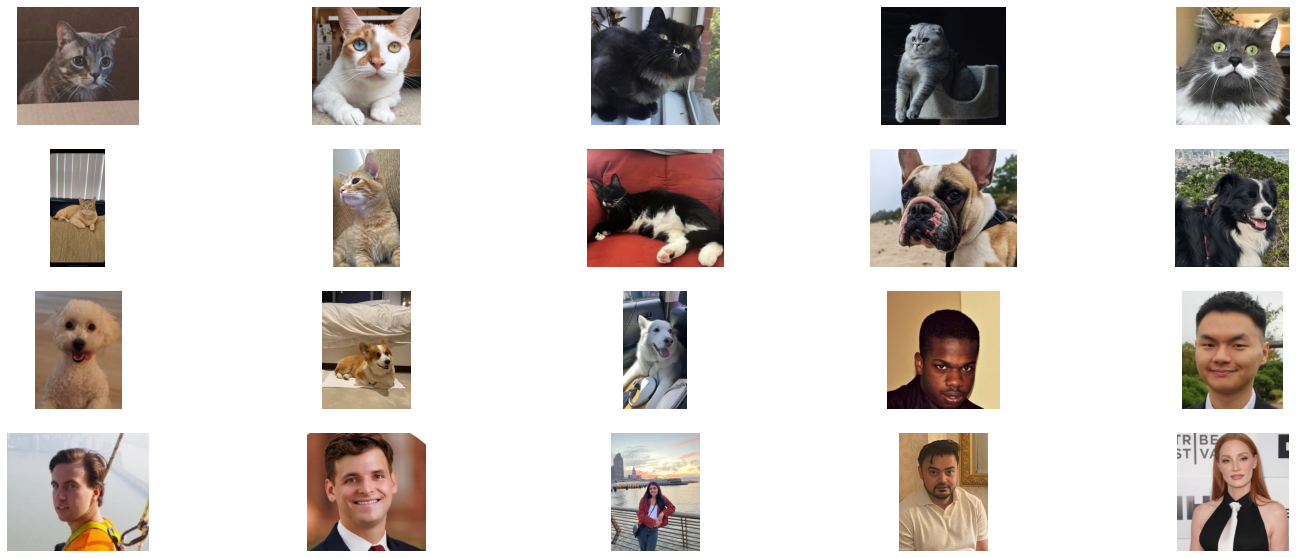

In [113]:
next_dog_pic = ['{}/prediction_images/dog/{}'.format(dir,path) for path in os.listdir('{}/prediction_images/dog'.format(dir))]
next_cat_pic = ['{}/prediction_images/cat/{}'.format(dir,path) for path in os.listdir('{}/prediction_images/cat'.format(dir))]
next_person_pic = ['{}/prediction_images/person/{}'.format(dir,path) for path in os.listdir('{}/prediction_images/person'.format(dir))]
# next_animal_pic = next_dog_pic + next_cat_pic

plt.figure(figsize=(25,10))
for i, img_path in enumerate(next_cat_pic + next_dog_pic + next_person_pic):
    ax = plt.subplot(4, 5, i+1)
    ax.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img)

In [114]:
valid_labels = []
valid_data = []

def FolderProcessor2(label,lst):
    folder = dir + '/prediction_images/{}'.format(label) 
    processed = [] # Storage container for images
    for img in os.listdir(folder): # For every image in the directory
        pic_dir = folder + '/{}'.format(img)
        processed.append(ImageProcessor(pic_dir))
        valid_labels.append(label)  # Add a class column
    lst.append(processed) # Convert to pd.DataFrame
    return processed

In [115]:
[FolderProcessor2(c, valid_data) for c in image_classes]

[[array([[[0.34901961, 0.26666667, 0.21960784],
          [0.34117647, 0.2627451 , 0.22352941],
          [0.35686275, 0.27843137, 0.23529412],
          ...,
          [0.33333333, 0.25490196, 0.22352941],
          [0.33333333, 0.25490196, 0.21960784],
          [0.3372549 , 0.25098039, 0.21960784]],
  
         [[0.34901961, 0.27058824, 0.21960784],
          [0.34117647, 0.2627451 , 0.22745098],
          [0.34117647, 0.2627451 , 0.21960784],
          ...,
          [0.3372549 , 0.25882353, 0.21960784],
          [0.32941176, 0.25098039, 0.21176471],
          [0.33333333, 0.25490196, 0.21568627]],
  
         [[0.3372549 , 0.2627451 , 0.21960784],
          [0.3372549 , 0.25882353, 0.21568627],
          [0.3372549 , 0.2627451 , 0.21960784],
          ...,
          [0.33333333, 0.25882353, 0.22352941],
          [0.32156863, 0.24705882, 0.21176471],
          [0.3372549 , 0.25098039, 0.21960784]],
  
         ...,
  
         [[0.74509804, 0.67058824, 0.59215686],
          [0.7

In [116]:
X_valid = np.concatenate(valid_data, axis=0)
y_valid = np.array(valid_labels)
print('Friend Picture Data Shape: {}'.format(X_valid.shape))
print('Friend Class Data Shape: {}'.format(y_valid.shape))

y_answers = LabelEncoder().fit_transform(y_valid)
y_answers_cat  = to_categorical(y_answers)

Friend Picture Data Shape: (20, 32, 32, 3)
Friend Class Data Shape: (20,)


In [117]:
image_classes

['cat', 'dog', 'person']

In [118]:
shuffle = np.arange(X_valid.shape[0])
np.random.seed(15)
np.random.shuffle(shuffle)
X_ = X_valid[shuffle]
y_ = y_answers_cat[shuffle]
friend_classes_enc = np.argmax(y_, axis = 1)

Predictions with ANN

In [119]:
mlp_nn.evaluate(X_,y_)

1/1 [==============================] - 0s 2ms/step - loss: 1.8741 - accuracy: 0.6667


[1.8741157054901123, 0.6666666865348816]

In [120]:
mlp_preds = np.argmax(mlp_nn.predict(X_), axis=1)

print("Predicted Classes:{}".format(mlp_preds))
print("Actual Classes:   {}".format(friend_classes_enc))
print("Accuracy Score: {}%".format(round(accuracy_score(mlp_preds,friend_classes_enc),4)*100))

Predicted Classes:[1 1 0 0 0 0 1 2 2 0 1 1 1 1 1 1 0 1 0 1]
Actual Classes:   [2 2 0 1 0 0 1 2 2 0 0 2 2 0 1 2 0 0 1 1]
Accuracy Score: 50.0%


Predictions with Basic CNN

In [121]:
CNN_basic.evaluate(X_,y_)

1/1 [==============================] - 0s 2ms/step - loss: 2.7786 - accuracy: 0.6000


[2.7785887718200684, 0.6000000238418579]

In [122]:
cnnbasic_preds = np.argmax(CNN_basic.predict(X_), axis=1)

print("Predicted Classes:{}".format(cnnbasic_preds))
print("Actual Classes:   {}".format(friend_classes_enc))
print("Accuracy Score: {}%".format(round(accuracy_score(cnnbasic_preds,friend_classes_enc),4)*100))

Predicted Classes:[1 1 1 0 1 0 1 2 0 1 1 1 2 1 1 1 0 1 1 1]
Actual Classes:   [2 2 0 1 0 0 1 2 2 0 0 2 2 0 1 2 0 0 1 1]
Accuracy Score: 40.0%


Predictions with LeNet-5

In [123]:
AlexNet.evaluate(X_,y_)

1/1 [==============================] - 0s 2ms/step - loss: 2.1764 - accuracy: 0.6667


[2.1763722896575928, 0.6666666865348816]

In [124]:
AlexNet_preds = np.argmax(AlexNet.predict(X_), axis=1)

print("Predicted Classes:{}".format(AlexNet_preds))
print("Actual Classes:   {}".format(friend_classes_enc))
print("Accuracy Score: {}%".format(round(accuracy_score(AlexNet_preds,friend_classes_enc),4)*100))

Predicted Classes:[1 1 0 1 1 0 1 2 2 1 1 1 1 1 1 1 0 1 1 1]
Actual Classes:   [2 2 0 1 0 0 1 2 2 0 0 2 2 0 1 2 0 0 1 1]
Accuracy Score: 50.0%
